In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple = pd.read_csv('../data/transactions/Tech/AAPL.csv')  
google = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
fb = pd.read_csv('../data/transactions/Tech/FB.csv')  
microsoft = pd.read_csv('../data/transactions/Tech/MSFT.csv')  
amazon = pd.read_csv('../data/transactions/Tech/AMZN.csv')  
print(apple.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   
1  2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   
2  2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533   
3  2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   
4  2014-01-08  76.972855  77.937141  76.955711  77.637146  65.793633   

      Volume  
0   58671200  
1   98116900  
2  103152700  
3   79302300  
4   64632400  


In [26]:
def getStock(stock):
    stock = stock.drop(['Date'],axis=1)
    stock=stock.astype('float64')
    return scale(stock)

def processData(data,result,input_unit,output_unit):
    X,Y = [],[]
    for i in range(len(data)-input_unit-output_unit):
        X.append(data[i:(i+input_unit)])
        temp = [result[j+i+input_unit] for j in range(output_unit)]
        Y.append(temp)
    return np.array(X),np.array(Y)



In [27]:
#model parameters
cell_unit = 128
learn_rate = 1e-2
decay_rate = 1e-6
train_epochs = 300

#input parameters
intput = apple
time_num = 2
output_num = 2
precentage = 0.75

In [33]:

mean =  np.mean(intput)
ma =  np.max(intput)
mi =  np.min(intput)
# data,result = getStock(intput)
data1 = getStock2(intput)

print(data[1:10])
data2 = getStock(intput)
print(data2[1:10])


[[0.05148716 0.04605565 0.04204824 0.03663169 0.02938017 0.33989539]
 [0.03773165 0.03996436 0.03592218 0.03925457 0.0314837  0.35965099]
 [0.04386406 0.0392228  0.03979693 0.03579593 0.02870971 0.26608512]
 [0.03894562 0.03886966 0.04048756 0.03883671 0.03114854 0.20853463]
 [0.04607779 0.04001731 0.03749181 0.03266621 0.02619956 0.22875708]
 [0.0398561  0.03466754 0.03368882 0.02948316 0.02364664 0.25408731]
 [0.03100121 0.03616831 0.03258561 0.03196382 0.02563629 0.32618949]
 [0.03841899 0.03990255 0.03956374 0.04144182 0.03323809 0.2811421 ]
 [0.05207629 0.05179386 0.05212081 0.05119542 0.04106069 0.33908254]]
[[0.05148716 0.04605565 0.04204824 0.03663169 0.02938017 0.33989539]
 [0.03773165 0.03996436 0.03592218 0.03925457 0.0314837  0.35965099]
 [0.04386406 0.0392228  0.03979693 0.03579593 0.02870971 0.26608512]
 [0.03894562 0.03886966 0.04048756 0.03883671 0.03114854 0.20853463]
 [0.04607779 0.04001731 0.03749181 0.03266621 0.02619956 0.22875708]
 [0.0398561  0.03466754 0.0336888

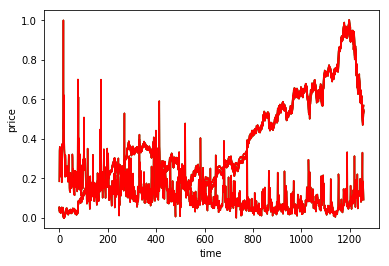

In [34]:
plt.plot(data,color='green')
plt.plot(data2,color='red')
plt.ylabel("price")
plt.xlabel("time")

plt.show()

In [ ]:
data,result = processData(data,result,time_num,output_num)
samples_num = data.shape[1]
features_num = data.shape[2]
print(data.shape)
print(result.shape)
n = len(data)
train_size = int(n*precentage)
data_train,data_test = data[0:train_size],data[train_size:]
result_train,result_test = result[0:train_size],result[train_size:]
print(data_train.shape)
print(result_train.shape)

In [148]:
# print(data_train)
print(result_train)

[[ 77.704285  77.148575]
 [ 77.148575  77.637146]
 [ 77.637146  76.645714]
 ...
 [150.550003 153.139999]
 [153.139999 154.229996]
 [154.229996 153.279999]]


In [140]:
# basic model

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
# model.add(Dropout(0.2))

# model.add(LSTM(cell_unit, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(time_steps, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(1))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')


In [149]:
# basic model mul output

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
# model.add(Dropout(0.2))

# model.add(LSTM(cell_unit, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(time_steps, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(output_num))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')


In [127]:
# mul model 1

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num),return_sequences = True, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(LSTM(cell_unit, activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(time_num, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(output_num))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')

In [134]:
# model 1

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num), activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(1))

apt = tf.keras.optimizers.Adam(lr=learn_rate, decay=decay_rate)
model.compile(optimizer=apt, loss='mse') 
callback = EarlyStopping(monitor='loss', patience=10,verbose=1,mode='auto')

In [150]:
history = model.fit(data_train,result_train, epochs = train_epochs, validation_data=(data_test,result_test),shuffle=False,callbacks =[callback])

Train on 940 samples, validate on 314 samples
Epoch 1/300
940/940 [==============================] - 2s 3ms/step - loss: 7804.2294 - val_loss: 7648.2060
Epoch 2/300
940/940 [==============================] - 0s 232us/step - loss: 4980.3295 - val_loss: 12893.9132
Epoch 3/300
940/940 [==============================] - 0s 224us/step - loss: 931.1767 - val_loss: 6199.8001
Epoch 4/300
940/940 [==============================] - 0s 227us/step - loss: 787.6051 - val_loss: 2818.8020
Epoch 5/300
940/940 [==============================] - 0s 231us/step - loss: 531.5725 - val_loss: 643.1489
Epoch 6/300
940/940 [==============================] - 0s 241us/step - loss: 297.4922 - val_loss: 392.1717
Epoch 7/300
940/940 [==============================] - 0s 230us/step - loss: 179.3346 - val_loss: 394.7947
Epoch 8/300
940/940 [==============================] - 0s 246us/step - loss: 152.8885 - val_loss: 242.6765
Epoch 9/300
940/940 [==============================] - 0s 230us/step - loss: 121.4348 - val_l

In [151]:
predictions = model.predict([data_test])
predictions = np.array(predictions)
real = result_test


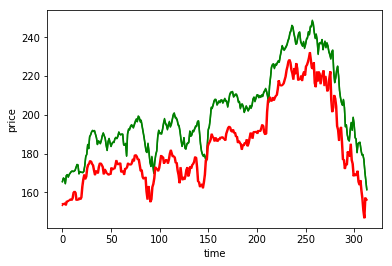

In [153]:
plt.plot(predictions,color='green')
plt.plot(real,color='red')
plt.ylabel("price")
plt.xlabel("time")

plt.show()



In [ ]:
# error
plt.plot((predictions-real)/(max(real)-min(real)),color='black')
plt.ylabel("error")
plt.xlabel("time")

plt.show()
print(real)